# Data

In [1]:
#load data
import pandas as pd
df = pd.read_csv('C:/Users/ZHANG Hang/Desktop/GitHub/2017.M3.TQF-ML/files/DataSet1/bank.csv',delimiter=',')

In [2]:
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion

if LooseVersion(sklearn_version) < LooseVersion('0.18'):
    raise ValueError('Please use scikit-learn 0.18 or newer')

In [3]:
#select features
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:,[5,12]]
y = df.iloc[:,16]

y = LabelEncoder()
y = y.fit_transform(df['y'].values)

df = pd.get_dummies(df[['balance', 'campaign','y']], drop_first=True)

In [4]:
#divide the whole data into train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [5]:
#nomalize the features
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Models

In [6]:
#define plot_decision_regions function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Logistic regression

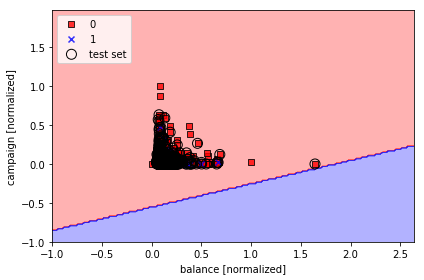

Accuracy: 0.89


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=2)
lr.fit(X_train_norm, y_train)

import numpy as np
X_combined_norm = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_norm, y_combined, classifier=lr, test_idx=range(3165, 4521))
plt.xlabel('balance [normalized]')
plt.ylabel('campaign [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#accuracy
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

## Support vector machines

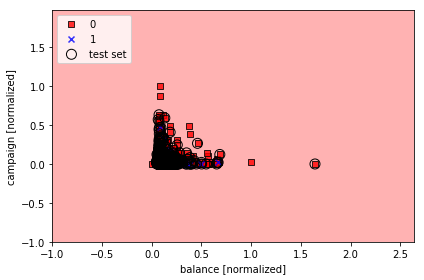

Accuracy: 0.89


In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=2)
svm.fit(X_train_norm, y_train)

X_combined_norm = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_norm, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(3165, 4521))
plt.xlabel('balance [normalized]')
plt.ylabel('campaign [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = svm.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

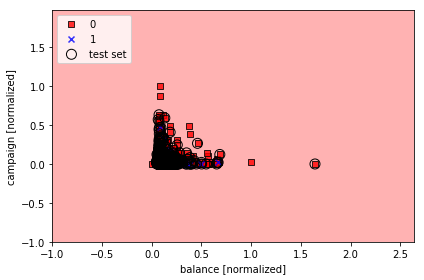

Accuracy: 0.89


In [ ]:
#solve non-linear data via kernel SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=2, gamma=0.2, C=1.0)
svm.fit(X_train_norm, y_train)

X_combined_norm = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_norm, y_combined,
                      classifier=svm, test_idx=range(3165,4521))
plt.xlabel('balance [normalized]')
plt.ylabel('campaign [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = svm.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=2)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(3165,4521))

plt.xlabel('balance [normalized]')
plt.ylabel('campaign [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = tree.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

## K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_norm, y_train)

X_combined_norm = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_norm, y_combined, 
                      classifier=knn, test_idx=range(3165,4520))

plt.xlabel('balance [normalized]')
plt.ylabel('campaign [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = knn.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))